# Сборный проект

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np     
from scipy import stats as st  #импорт всех необходимых библиотек

In [2]:
data = pd.read_csv('/datasets/games.csv') #чтение данных и ввод датафрейма в новую переменную

In [3]:
data.info()  #вывод общей информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head() #вывод пяти строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.tail() #вывод последних пяти строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Вывод по разделу:** успешно познакомились открыли файл с данными и ознакомились с его содержимым. В датафрейме 11 столбцов, 16715 строк, тип данных в колонках - float64, object. 

**Шаг 2. Подготовьте данные**

**Задание:** Замените названия столбцов (приведите к нижнему регистру);

In [6]:
data.columns = data.columns.str.lower() #приведение всех названий столбцов к нижнему регистру.

**Задание:** Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:
    
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;**

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [7]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y') #пребразование year_of_release в datetime64

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') #пребразование user_score в данные типа numeric

In [9]:
data.isna().sum() #вывод всех пропущенных значений в таблице

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
data['name'] = data['name'].fillna('unknown') #добавление имени unknown в пропущенные значения, так как имя неизвестно

In [11]:
data['genre'] = data['genre'].fillna('unknown') #добавление жанра unknown в пропущенные значения, так как жанр неизвестен

In [12]:
data['rating'] = data['rating'].fillna('unknown') #добавление рейтинга unknown в пропущенные значения, так как рейтинг неизвестен

In [13]:
data.isna().sum() #повторная проверка изменений

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

**Задание:** Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
#суммирование всех продаж во всех регионах и занесение результата в столбец sum_sales

In [15]:
data.head() #проверка наличия столбца sum_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [16]:
data['platform'].unique() #проверка на неявные дубликаты

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
data['genre'].unique() #проверка на неявные дубликаты

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [18]:
data['rating'].unique() #проверка на неявные дубликаты

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']).sum()

2

In [20]:
data = data.drop_duplicates()

**Вывод по разделу:** преобразовали некоторые данные в нужные типы, описали в каких столбцах изменили тип данных и почему. Заполнили некоторый вид данных именем 'unknown'. Пропуски в столбцах year of release, critic_score, user_score нельзя ни заменить, ни удалить, так как это сильно повлияет на конечные выводы по данным. 
Причины по которым могли образоваться пропуски: не предоставлены данные, ошибки в сборе данных, технические проблемы при передаче или хранении данных. Также проверили данные на наличие неявных дубликатов.
Значение tbd (to be defined), к сожалению, никак нельзя обработать, так как любая замена на случайное значение может изменить конечный вывод по данным, так же как и удаление данных (пропусков).

**Шаг 3. Проведите исследовательский анализ данных**

**Задание:** Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
numbergames_per_year = data.groupby('year_of_release')['name'].count()

<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='Год выпуска', ylabel='Количество выпущенных игр'>

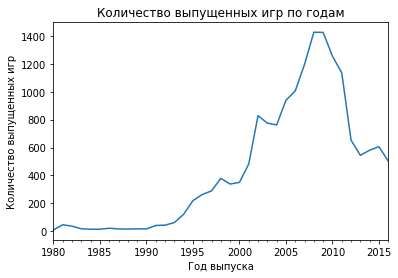

In [22]:
numbergames_per_year.plot(title='Количество выпущенных игр по годам', 
                          xlabel='Год выпуска', ylabel='Количество выпущенных игр') #график выпуска игр по годам

**Вывод по графику** согласно графику основной выпуск игр пришелся с 1995 года. На графике отчетливо видна кривая, ползущая вниз в 2015 году. Отсюда можно сделать вывод, что данные важны с 2015 года.

**Задание:** Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
sales_platforms = data.groupby('platform')['sum_sales'].sum()

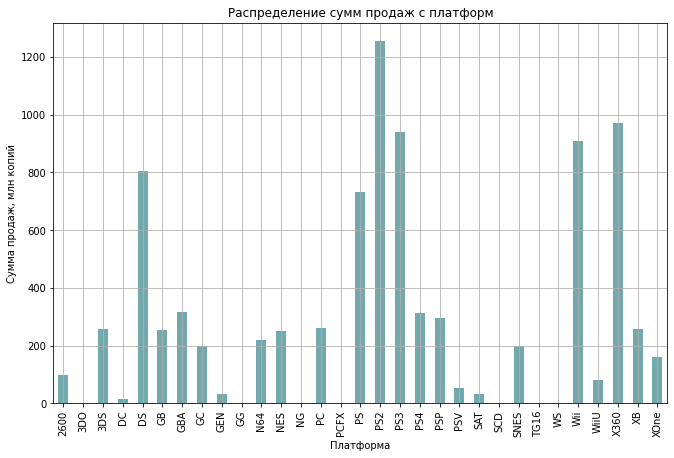

In [24]:
sales_platforms.plot(kind='bar', figsize=(11, 7), color='#73A9AD', grid=True) #построение графика для сумм продаж по платформам
plt.title('Распределение сумм продаж с платформ')
plt.xlabel('Платформа') 
plt.ylabel('Сумма продаж, млн копий')
plt.show()

In [25]:
sales_platforms.sort_values(ascending=False).head(5) #вывод пяти игровых платформ с наиболее большими суммарными продажами

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: sum_sales, dtype: float64

**Промежуточный вывод:** платформами с самыми многочисленными суммарными продажами являются PS2, X360, PS3, Wii, DS.

In [26]:
data_platforms = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]') #получаем срез по выбранным платформам

In [27]:
new_data = data_platforms.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum') 

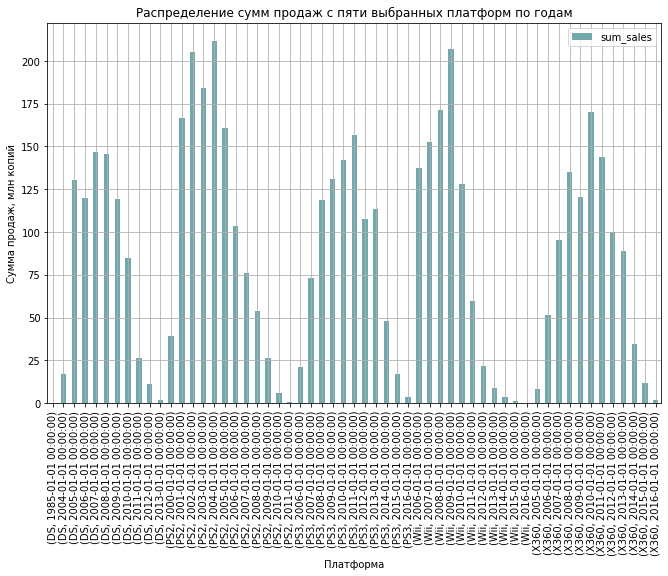

In [28]:
new_data.plot(kind='bar', figsize=(11, 7), color='#73A9AD', grid=True)
plt.title('Распределение сумм продаж с пяти выбранных платформ по годам') #построение графика пяти маржинальных платформ по годам выпуска
plt.xlabel('Платформа') 
plt.ylabel('Сумма продаж, млн копий')
plt.show()

**Вывод по графику:** из графика видно, что новые платформы выпускаются обычно раз в 10 лет, исключение - платформа DS. Актуальным периодом, можно считать данные с 2014 года, так как с этого периода пришелся основной спад на выпуск игр. 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [29]:
data_actual = data.query('year_of_release >= 2014') #выполним срез по данным с 2014 года включительно

**Задание:** Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

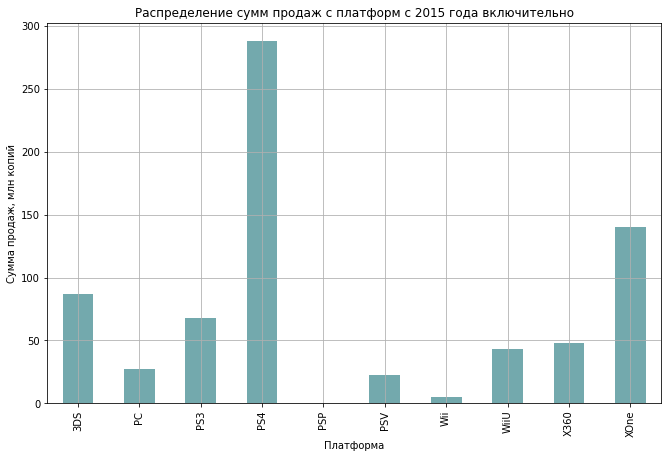

In [30]:
data_actual.groupby('platform')['sum_sales'].sum().plot(kind='bar', figsize=(11, 7), color='#73A9AD', grid=True)
plt.title('Распределение сумм продаж с платформ c 2015 года включительно') #построение графика всех платформ с 2000 года за все время
plt.xlabel('Платформа') 
plt.ylabel('Сумма продаж, млн копий')
plt.show()

In [31]:
platform_year_sales = data_actual.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index()

In [32]:
platform_year_sales_sorted = platform_year_sales.sort_values(by='sum_sales', ascending=False)

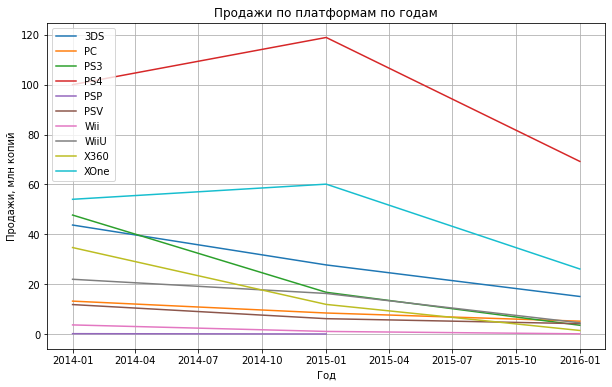

In [33]:
plt.figure(figsize=(10, 6))                                                      #вывод графика по суммам продаж по платформам с 2000 года
for platform in platform_year_sales['platform'].unique():  
    subset = platform_year_sales[platform_year_sales['platform'] == platform]
    plt.plot(subset['year_of_release'], subset['sum_sales'], label=platform)

plt.title('Продажи по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [34]:
platform_year_sales_sorted.query('year_of_release == 2016') #вывод за 2016 год

,platform,year_of_release,sum_sales
11,PS4,2016-01-01,69.25
28,XOne,2016-01-01,26.15
2,3DS,2016-01-01,15.14
5,PC,2016-01-01,5.25
22,WiiU,2016-01-01,4.60
16,PSV,2016-01-01,4.25
8,PS3,2016-01-01,3.60
25,X360,2016-01-01,1.52
19,Wii,2016-01-01,0.18


**Вывод по графикам:** лидируют по продажам (с 2014 года) - PS4, XOne, 3DS. В целом видна тенденция к снижению объема продаж у всех платформ с 2015 года. Из самых потенциально прибыльных к 2017 году - PS4, Xone, 3DS (согласно таблице за 2016 год и графику продажи по платформам.)

**Задание:** Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

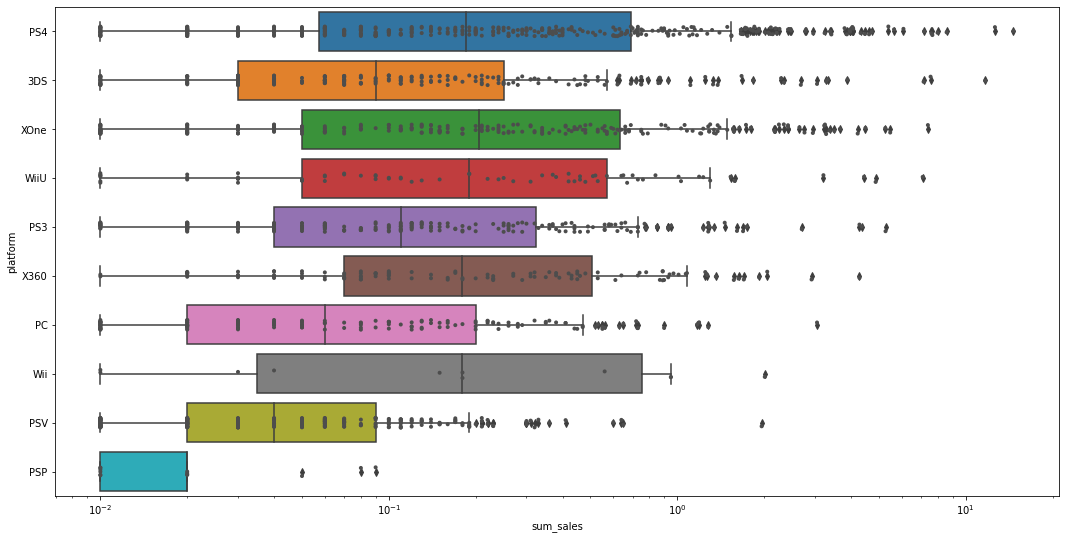

In [35]:
#построение боксплота по глобальным продажам с 2015 года.
fig, ax = plt.subplots(figsize=(18, 9))

# добавдяем боксплот и устанавливаем логирифмическую шкалу
sns.boxplot(x="sum_sales", y="platform",
            data=data_actual)
ax.set_xscale("log")

# добавляем точки
sns.stripplot(data=data_actual, x='sum_sales', y='platform', size=4, color=".3")

**Вывод по графику:** успешно построили график по продажами с разбивкой по платформам. Видно, что самую низкую медиану имеет платформа PSV, самую высокую - платформа WiiU. Также отчетливо видно, что многие значения по продажам сильно выбиваются из межквартильного размаха, это может указывает на широкое распределение данных. 

**Задание:** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем в качестве примера платформу PS4.

0.40266141068104083

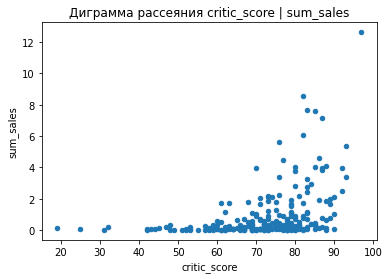

In [36]:
data_actual.query('platform == "PS4"').plot(x='critic_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния critic_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "PS4"')['critic_score'].corr(data_actual.query('platform == "PS4"')['sum_sales']) #вывод корреляции

-0.040131589472697356

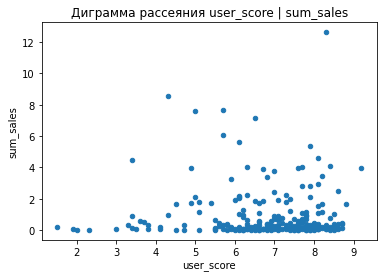

In [37]:
data_actual.query('platform == "PS4"').plot(x='user_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния user_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "PS4"')['user_score'].corr(data_actual.query('platform == "PS4"')['sum_sales']) #вывод корреляции

**Вывод по графикам и корреляциям:** отзывы пользователей неощутимо влияют на сумму продаж, в то время как отзывы критиков имеют слабую положительную корреляцию с суммой продаж для платформы PS4. 

**Задание:** Соотнесите выводы с продажами игр на других платформах.

Возьмем для другого примера платформу XOne

0.42867694370333226

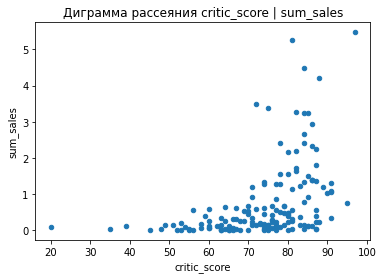

In [38]:
data_actual.query('platform == "XOne"').plot(x='critic_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния critic_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "XOne"')['critic_score'].corr(data_actual.query('platform == "XOne"')['sum_sales']) #вывод корреляции

-0.0703839280647581

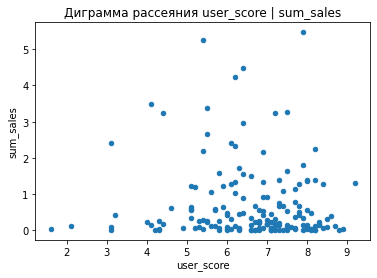

In [39]:
data_actual.query('platform == "XOne"').plot(x='user_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния user_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "XOne"')['user_score'].corr(data_actual.query('platform == "XOne"')['sum_sales']) #вывод корреляции

Возьмем для другого примера платформу 3DS

0.314117492869051

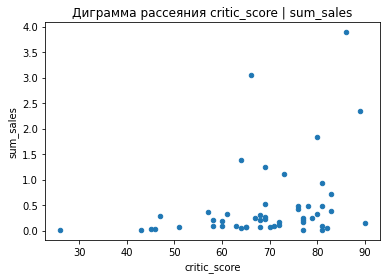

In [40]:
data_actual.query('platform == "3DS"').plot(x='critic_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния critic_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "3DS"')['critic_score'].corr(data_actual.query('platform == "3DS"')['sum_sales']) #вывод корреляции

0.2151932718527028

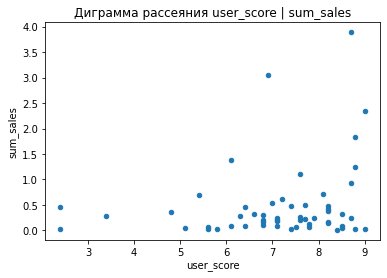

In [41]:
data_actual.query('platform == "3DS"').plot(x='user_score', y='sum_sales', kind='scatter', title='Диграмма рассеяния user_score | sum_sales') #вывод диаграммы рассеяния
data_actual.query('platform == "3DS"')['user_score'].corr(data_actual.query('platform == "3DS"')['sum_sales']) #вывод корреляции

**Вывод по графикам и корреляциям:** данный график подтвердил предыдущую теорию, мнение критиков действительно оказывает некоторое влияние на конечную сумму продаж, в отличии от мнения пользователей.

**Задание:** посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
data_genre_sum = data_actual.groupby('genre')['sum_sales'].sum().reset_index() #вывод распределения сумм продаж по жанрам.

In [43]:
data_genre_sum.sort_values(by='sum_sales', ascending=False) 

,genre,sum_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


<AxesSubplot:xlabel='sum_sales', ylabel='genre'>

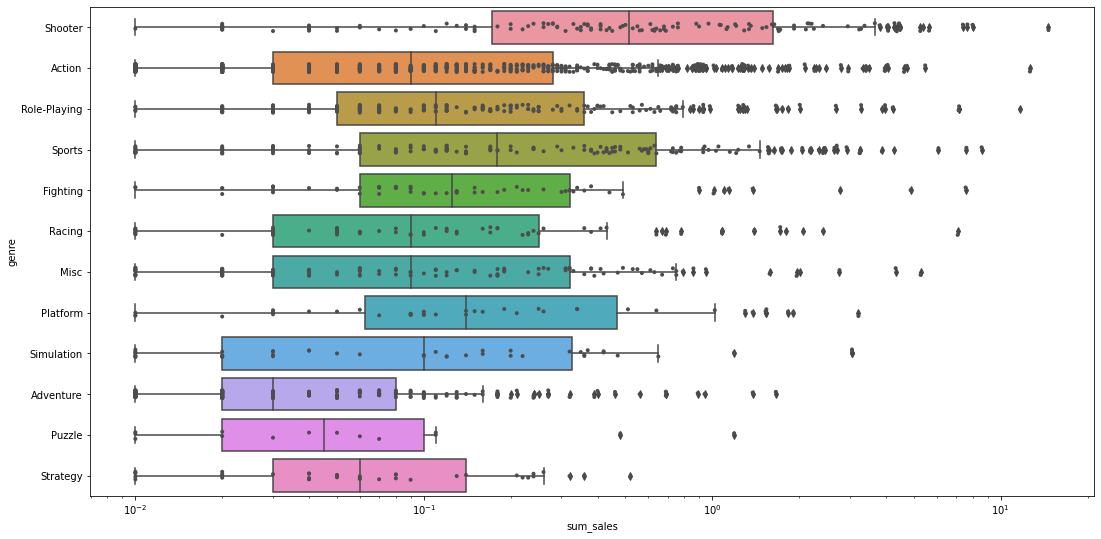

In [44]:
#построение боксплота 
fig, ax = plt.subplots(figsize=(18, 9))

# добавдяем боксплот и устанавливаем логирифмическую шкалу
sns.boxplot(x="sum_sales", y="genre",
            data=data_actual)
ax.set_xscale("log")

# добавляем точки
sns.stripplot(data=data_actual, x='sum_sales', y='genre', size=4, color=".3")

**Вывод по таблице:** самым продаваемым жанром является жанр Shooter, самым нерентабельным - жанр Adventure. 

**Вывод по разделу:** успешно провели исследовательский анализ данных, в ходе которого построили различные графики, гистограммы и таблицы. Было показано, что актуальные период для исследования данных являются данные с 2014 года. Также была показана корреляция между отзывами критиков и сумм продаж (выявилась слабая положительная корреляция). А самым прибыльным жанром оказался жанр Shooter.

**Шаг 4. Составьте портрет пользователя каждого региона**

**Задание:** Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [45]:
data_na_sales = data_actual.groupby('platform')['na_sales'].sum().reset_index() #вывод распределения сумм продаж по северной америке.

In [46]:
data_eu_sales = data_actual.groupby('platform')['eu_sales'].sum().reset_index() #вывод распределения сумм продаж по европе.

In [47]:
data_jp_sales = data_actual.groupby('platform')['jp_sales'].sum().reset_index() #вывод распределения сумм продаж по японии.

In [48]:
data_na_sales.sort_values(by='na_sales', ascending=False).head() #вывод пяти самых популярных платформ для северной америки

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [49]:
data_eu_sales.sort_values(by='eu_sales', ascending=False).head() #вывод пяти самых популярных платформ для европы

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [50]:
data_jp_sales.sort_values(by='jp_sales', ascending=False).head() #вывод пяти самых популярных платформ для японии

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


**Вывод:** из таблиц видны пять самых популярных платформ для различных регионов с 2014 года. Самыми популярными платформами являются PS4, XOne, X360 для Северной Америки. Для Европы: PS4, XOne, PS3. Для Японии: 3DS, PS4, PSV. Также видно, что с 2014 года доля продаж для 5 востребованных платформ значительно меньше, чем для Европы и Северной Америки.  

**Задание:** 
- Самые популярные жанры (топ-5). Поясните разницу.

In [51]:
data_na_genre = data_actual.groupby('genre')['na_sales'].sum().reset_index()

In [52]:
data_eu_genre = data_actual.groupby('genre')['eu_sales'].sum().reset_index()

In [53]:
data_jp_genre = data_actual.groupby('genre')['jp_sales'].sum().reset_index()

In [54]:
data_na_genre.sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [55]:
data_eu_genre.sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [56]:
data_jp_genre.sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


**Вывод:** в Северной Америке и Европе топ популярных жанров практически один и тот же, с различием по пятому месту, в северной Америке это Shooter, в Европе - Action. Что касается Японии, то такие жанры как action, shooter также входят в пятерку, но на первом месте тут Role-Playing. 

**Задание:**
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [57]:
data_na_rating = data_actual.groupby('rating')['na_sales'].sum().reset_index()

In [58]:
data_eu_rating = data_actual.groupby('rating')['eu_sales'].sum().reset_index()

In [59]:
data_jp_rating = data_actual.groupby('rating')['jp_sales'].sum().reset_index()

In [60]:
data_na_rating.sort_values(by='na_sales', ascending=False)

,rating,na_sales
2,M,96.42
4,unknown,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


In [61]:
data_eu_rating.sort_values(by='eu_sales', ascending=False)

,rating,eu_sales
2,M,93.44
4,unknown,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


In [62]:
data_jp_rating.sort_values(by='jp_sales', ascending=False)

,rating,jp_sales
4,unknown,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


**Вывод по таблицам:** Пример рейтингов ESRB:
E (Everyone): Подходит для всех возрастов.
E10+ (Everyone 10+): Подходит для детей от 10 лет и старше.
T (Teen): Подходит для подростков от 13 лет и старше.
M (Mature): Подходит для взрослых от 17 лет и старше.
AO (Adults Only): Подходит только для взрослых (18+).
RP (Rating Pending): Рейтинг находится в процессе рассмотрения. 

Согласно данным таблиц, рейтинг действительно влияет на совокупность продаж во всех регионах. Показано, что рейтинг M (для взрослых) самый высоко-маржинальный. Далее идет рейтинг для всех. Тем не менее, нельзя сказать что рейтинг как-то отдельно влияет на совокупность продаж в конкретном регионе. 

**Вывод по разделу:** успешно составили портрет пользователя каждого региона. Самый распространенные типы покупателей: для северной америки - держатель платформы PS4, жанр игр Shooter, категория игр M. Для европы - держатель платформы PS4, жанр игр Action, категория игр M. Для Японии - платформа 3DS, жанр Role-Playing, категория - для подростков.

**Шаг 5. Проверьте гипотезы**

**Задание:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: средние пользовательские рейтинги платформ Xone и PC одинаковы.

Альтернативная гипотеза: средние пользователские рейтинги платформ Xone и PC разные

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Гипотезы верные. Отлично!
</div>

In [63]:
data_stat = data_actual.query('platform == "XOne"')['user_score'].reset_index()  #вывод нужных датафреймов
data_stat2 = data_actual.query('platform == "PC"')['user_score'].reset_index()
data_stat_filtered = data_stat.dropna()
data_stat2_filtered = data_stat2.dropna()

In [64]:
print('среднее первой выборки - Xone:', np.mean(data_stat_filtered['user_score']))   #проверка статистической гипотезы
print('среднее первой выборки - PC:', np.mean(data_stat2_filtered['user_score']))
alpha = 0.05
results = st.ttest_ind(data_stat_filtered['user_score'], data_stat2_filtered['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки - Xone: 6.594545454545456
среднее первой выборки - PC: 6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод:** согласно статистическому тесту, можно сказать, что средние пользовательские рейтинги платформ XOne и PC одинаковы.

**Задание:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковы.

Альтернативная гипотеза: средние пользователские рейтинги жанров Action и Sports разные

In [65]:
data_stat3 = data_actual.query('genre == "Action"')['user_score'].reset_index()
data_stat4 = data_actual.query('genre == "Sports"')['user_score'].reset_index()
data_stat3_filtered = data_stat3.dropna()
data_stat4_filtered = data_stat4.dropna()

In [66]:
print('среднее первой выборки - Action:', np.mean(data_stat3_filtered['user_score']))   #проверка статистической гипотезы
print('среднее первой выборки - Sports:', np.mean(data_stat4_filtered['user_score']))
alpha = 0.05
results = st.ttest_ind(data_stat3_filtered['user_score'], data_stat4_filtered['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки - Action: 6.760606060606061
среднее первой выборки - Sports: 5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод:** согласно статистическому тесту, можно сказать, что средние пользовательские рейтинги жанров игр Action и Sports статистически разные

**Задание:** Какой критерий применили для проверки гипотез и почему.

Ответ: Применили двухвыборочный t-тест для независимых выборок. Так-как требуется проверить две независимые выборки.

**Шаг 6. Напишите общий вывод**

**Итоговый вывод:** в ходе проекта успешно подготовили данные, провели предобработку, исследовательский анализ данных, а также проверили две статистические гипотезы. Провели подсчет суммарных продаж и занесли значения в отдельный столбец. В ходе предобработки успешно преобразовали данные в нужные типы, обработали пропуски в некоторых столбцах. На этапе исследовательского анализа данных построили различные графики, гистограммы и таблицы. Было показано, что актуальные период для исследования данных являются данные с 2015 года, так как именно с этого времени начался основной спад продажа игр. Также была показана корреляция между отзывами критиков и сумм продаж (выявилась слабая положительная корреляция). Отдельно составили портрет пользователя для каждого региона: для северной америки для европы и для Японии. В ходе проверки гипотез, статистически доказали, что средние пользовательские рейтинги платформ XOne и PC одинаковы, а средние пользовательские рейтинги жанров игр Action и Sports статистически разные.

**Из рекомандаций:** Данные (c 2015 года) говорят о том , что особым успехом, особенно в Европе и Северной Америке пользуются игры категории для взрослых, жанра Shooter. А наиболее пользующаяся платформой является PS4. Соответственно необходимо делать ставку на данные категории игр и для данной платформы. 